#### Megan Sharkey
#### HW 13
##### November 12 2025

In [219]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip
from matplotlib.gridspec import GridSpec
import netCDF4 as nc4
from eccoseas.downscale import vertical
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

In [220]:
# Define a path to this lesson's folder
lesson_folder = '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13'

In [221]:
# define the parameters that will be used in the data file
XC = np.fromfile('/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 8/my_model/XC720_540.bin', '>f8').reshape(720, 1)
#print(XC)
YC = np.fromfile('/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 8/my_model/YC720_540.bin', '>f8').reshape(540, 1)
#print(YC)
delX = 3.595/720
delY = 1.078/540
xgOrigin = -52.8
ygOrigin = 63.8
n_rows = 540
n_cols = 720

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

# read in the bathymetry file
bathy = np.fromfile(os.path.join('/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 9',
                                 'Greenland_bathymetry.bin'),'>f4').reshape(np.shape(XC))

In [222]:
depth = bathy
delR = np.array([1.00,    1.14,    1.30,    1.49,   1.70,
          1.93,    2.20,    2.50,    2.84,   3.21,
          3.63,    4.10,    4.61,    5.18,   5.79,
          6.47,    7.20,    7.98,    8.83,   9.73,
         10.69,   11.70,   12.76,   13.87,  15.03,
         16.22,   17.45,   18.70,   19.97,  21.27,
         22.56,   23.87,   25.17,   26.46,  27.74,
         29.00,   30.24,   31.45,   32.65,  33.82,
         34.97,   36.09,   37.20,   38.29,  39.37])
hfacC_file = '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/hFacC.data'
hfacC = np.fromfile(hfacC_file, '>f4').reshape(45, 540, 720)
land_mask = (hfacC[0, :, :] == 0)   # True = land/dry, False = ocean

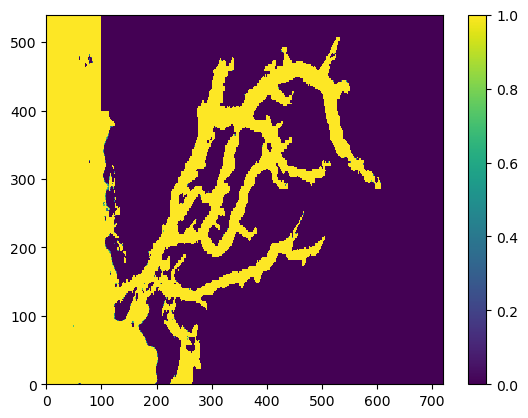

In [223]:
plt.pcolormesh(hfacC[10,:,:], vmax = 1)
plt.colorbar()

In [224]:
print(np.fromfile('/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/diags/TS_surf_daily_mean/TS_surf_daily_mean.0000000030.data').shape)


(388800,)


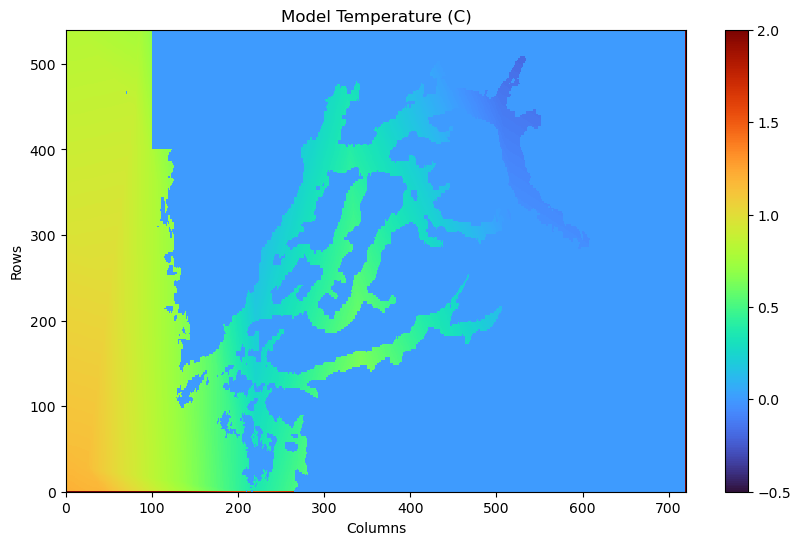

In [225]:
# make a figure object
fig = plt.figure(figsize = (10,6))

# plot the field
plt.pcolormesh(THETA[0,:,:], cmap='turbo', vmin = -.5, vmax = 2) #other good colormap is cmap = cm.balance

# add a colorbar
plt.colorbar()

# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Temperature (C)')
plt.show()

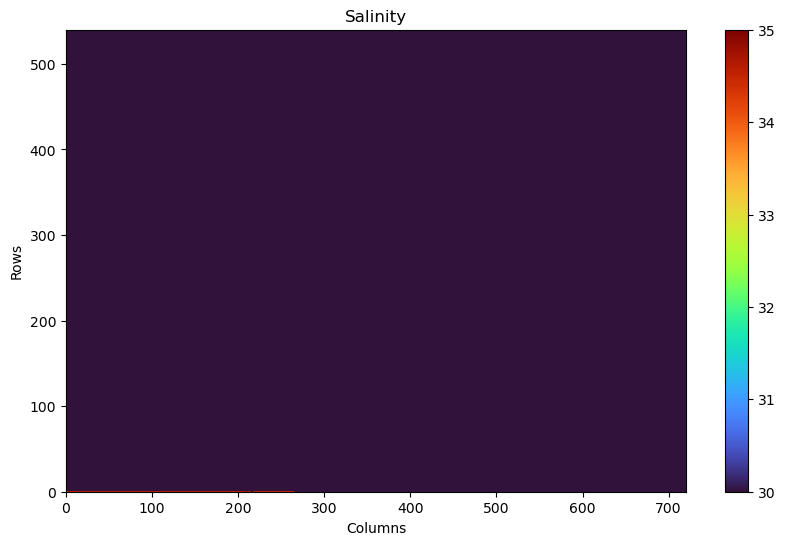

In [226]:
# make a figure object
fig = plt.figure(figsize = (10,6))

# plot the field
plt.pcolormesh(SALT[0,:,:], cmap='turbo', vmin = 30 , vmax = 35) #other good colormap is cmap = cm.balance

# add a colorbar
plt.colorbar()

# show the figure
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Salinity')
plt.show()

In [227]:
timestep = 60
ny, nx = 540, 720

def read_surface_conditions_from_file(lesson_folder, timestep = 60):

    theta_list = []
    salt_list  = []
    uvel_list  = []
    vvel_list  = []
    
    for i in range(30,1890, timestep):
        TS_surf_file = os.path.join(lesson_folder, 'diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.'+'{:010d}'.format(i)+'.data')
        TS_surf_grid = np.fromfile(TS_surf_file, '>f4').reshape(2, 540, 720)
        theta = TS_surf_grid[0,:,:]
        salt = TS_surf_grid[1,:,:]

        theta_list.append(theta)
        salt_list.append(salt)
        
        UV_surf_file = os.path.join(lesson_folder, 'diags', 'UV_surf_daily_mean', 'UV_surf_daily_mean.'+'{:010d}'.format(i)+'.data')
        UV_surf_grid = np.fromfile(UV_surf_file, '>f4').reshape(2, 540, 720)
        uvel = UV_surf_grid[0,:,:]
        vvel = UV_surf_grid[1,:,:]

        uvel_list.append(uvel)
        vvel_list.append(vvel)

    theta = np.array(theta_list)
    salt  = np.array(salt_list)
    uvel  = np.array(uvel_list)
    vvel  = np.array(vvel_list)
    
    return theta, salt, uvel, vvel
    
THETA, SALT, UVEL, VVEL = read_surface_conditions_from_file(lesson_folder)

print(THETA.shape)   # (nt, 540, 720)
print(UVEL.shape)    # (nt, 540, 720)

(31, 540, 720)
(31, 540, 720)


In [228]:
print("THETA min/max:", THETA.min(), THETA.max())
print("SALT  min/max:", SALT.min(),  SALT.max())
print("UVEL  min/max:", UVEL.min(),  UVEL.max())
print("VVEL  min/max:", VVEL.min(),  VVEL.max())

THETA min/max: -0.32379848 20.0
SALT  min/max: -0.18475232 34.56112
UVEL  min/max: -2.0528018 2.084504
VVEL  min/max: -1.8636103 2.4173295


In [229]:
print("Min, max:", SALT[n,:,:].min(), SALT[n,:,:].max())
print("Std dev:", SALT[n,:,:].std())

Min, max: -0.18426393 34.56112
Std dev: 2.0195692


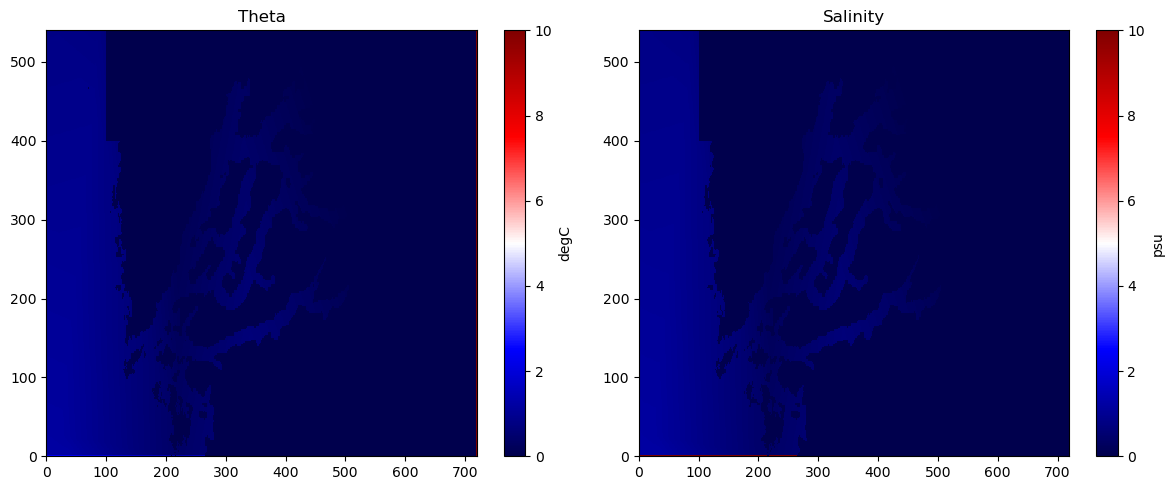

In [230]:
# for some reason theta and salt are plotting as the same? 

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im0 = axes[0].pcolormesh(THETA[0, :, :], cmap='seismic', vmin=0, vmax=10)
axes[0].set_title('Theta')
fig.colorbar(im0, ax=axes[0], label='degC')

im1 = axes[1].pcolormesh(SALT[0, :, :], cmap='seismic', vmin=0, vmax=10)
axes[1].set_title('Salinity')
fig.colorbar(im1, ax=axes[1], label='psu')

plt.tight_layout()
plt.show()


In [231]:
plots_dir = os.path.join(lesson_folder, 'plots')
os.makedirs(plots_dir, exist_ok=True)

file_list = []
num_timesteps = THETA.shape[0]

for n in range(num_timesteps):
    
    iteration = 30 + n * timestep
    iteration_str = '{:010d}'.format(iteration)

    image_path = os.path.join(plots_dir, f'T_surf_{iteration_str}.png')

    T = THETA[n, :, :]
    T_masked = np.ma.masked_where(land_mask, T)

    fig = plt.figure(figsize=(10, 6))
    plt.pcolormesh(T_masked, cmap='turbo', vmin = -.5, vmax = 2)
    plt.colorbar(label='degC')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    plt.title(f'Sea Surface Temperature – iteration: {iteration_str}')

    plt.savefig(image_path)
    plt.close(fig)

    file_list.append(image_path)

print("Number of frames:", len(file_list))
print("First few frames:", file_list[:3])


Number of frames: 31
First few frames: ['/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/T_surf_0000000030.png', '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/T_surf_0000000090.png', '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/T_surf_0000000150.png']


In [232]:
fps=5

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

output_file = os.path.join(lesson_folder, 'plots', 'THETA.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/THETA.mp4.
Moviepy - Writing video /Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/THETA.mp4



Moviepy - Done !
Moviepy - video ready /Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/THETA.mp4


In [234]:
Salt_file_list = []
Salt_num_timesteps = SALT.shape[0]

for n in range(Salt_num_timesteps):
    iteration = 30 + n * timestep
    iteration_str = '{:010d}'.format(iteration)

    image_path = os.path.join(plots_dir, f'S_surf_{iteration_str}.png')

    S = SALT[n, :, :]
    S_masked = np.ma.masked_where(land_mask, S)

    fig = plt.figure(figsize=(10, 6))
    plt.pcolormesh(S_masked, cmap='turbo', vmin=0, vmax=35)
    plt.colorbar(label='psu')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    plt.title(f'Salinity – iteration: {iteration_str}')

    plt.savefig(image_path)
    plt.close(fig)

    Salt_file_list.append(image_path)

print("Number of frames:", len(Salt_file_list))
print("First few frames:", Salt_file_list[:3])


Number of frames: 31
First few frames: ['/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/S_surf_0000000030.png', '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/S_surf_0000000090.png', '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/S_surf_0000000150.png']


In [235]:
fps=5

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(Salt_file_list, fps=fps)

output_file = os.path.join(lesson_folder, 'plots', 'SALT.mp4')
clip.write_videofile(output_file)

Moviepy - Building video /Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/SALT.mp4.
Moviepy - Writing video /Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/SALT.mp4



Moviepy - Done !
Moviepy - video ready /Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 13/plots/SALT.mp4


In [ ]:
print("SALT shape:", SALT.shape)

print("SALT[0, 0, 0] =", SALT[0, 0, 0])
print("SALT[0, 100, 200] =", SALT[0, 100, 200])
print("SALT[0, 250, 400] =", SALT[0, 250, 400])


In [ ]:
UVEL_file_list = []
UVEL_num_timesteps = UVEL.shape[0]

for n in range(UVEL_num_timesteps):
    
    iteration = 30 + n * timestep
    iteration_str = '{:010d}'.format(iteration)

    image_path = os.path.join(plots_dir, f'U_surf_{iteration_str}.png')

    U = UVEL[n, :, :]
    U_masked = np.ma.masked_where(land_mask, U)

    fig = plt.figure(figsize=(10, 6))
    plt.pcolormesh(U_masked, cmap='seismic', vmin = -1, vmax = 1)
    plt.colorbar(label='m/s')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    plt.title(f'UVEL – iteration: {iteration_str}')

    plt.savefig(image_path)
    plt.close(fig)

    UVEL_file_list.append(image_path)

print("Number of frames:", len(UVEL_file_list))
print("First few frames:", UVEL_file_list[:3])


In [ ]:
fps=5

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(UVEL_file_list, fps=fps)

output_file = os.path.join(lesson_folder, 'plots', 'UVEL.mp4')
clip.write_videofile(output_file)

In [ ]:
VVEL_file_list = []
VVEL_num_timesteps = UVEL.shape[0]

for n in range(VVEL_num_timesteps):

    iteration = 30 + n * timestep
    iteration_str = '{:010d}'.format(iteration)

    image_path = os.path.join(plots_dir, f'U_surf_{iteration_str}.png')

    V = VVEL[n, :, :]
    V_masked = np.ma.masked_where(land_mask, V)

    fig = plt.figure(figsize=(10, 6))
    plt.pcolormesh(V_masked, cmap='seismic', vmin = -1, vmax = 1)
    plt.colorbar(label='m/s')
    plt.xlabel('Model Columns')
    plt.ylabel('Model Rows')
    plt.title(f'VVEL – iteration: {iteration_str}')

    plt.savefig(image_path)
    plt.close(fig)

    VVEL_file_list.append(image_path)

print("Number of frames:", len(VVEL_file_list))
print("First few frames:", VVEL_file_list[:3])


In [ ]:
fps=5

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(VVEL_file_list, fps=fps)

output_file = os.path.join(lesson_folder, 'plots', 'VVEL.mp4')
clip.write_videofile(output_file)